In [1]:
include("../src/CoherentStructures.jl") #this is terrible but neccessary during development (?)

Main.CoherentStructures

In [2]:
using StreamMacros, Main.CoherentStructures
using Tensors, Arpack, Distances
using Plots, UnicodePlots

In [4]:
# Parameters
grid_resolution        = 1000
quadrature_order       = 1
nevs                   = 20
topk                   = 9
a                      = .98;   # parameter value corresponding to ϵ=0

In [5]:
T(x ,p) = [rem2pi(x[1] + x[2] + (p+a)*sin(x[1]), RoundDown),
           rem2pi(       x[2] + (p+a)*sin(x[1]), RoundDown)]

T (generic function with 1 method)

In [6]:
LL, UR = (0.0, 0.0), (2π, 2π)
ctx, _ = regularTriangularGrid((grid_resolution, grid_resolution), LL, UR, quadrature_order = quadrature_order)
pred(x,y) = peuclidean(x, y, [2π, 2π]) < 1e-9
bdata = BoundaryData(ctx, pred);

In [7]:
M = assembleMassMatrix(ctx, bdata=bdata);

In [8]:
# assemble K
DT₀(x) = linearized_transfer_function_autodiff(y -> T(y,0) , x)
A₀(x) = 0.5*(one(Tensor{2,2}) + dott(inv(DT₀(x))))
@time K = assembleStiffnessMatrix(ctx, A₀, bdata=bdata)
nothing

  9.811992 seconds (201.84 M allocations: 6.787 GiB, 9.85% gc time)


In [9]:
λ, u = eigs(K, M, nev=topk, which=:SM);

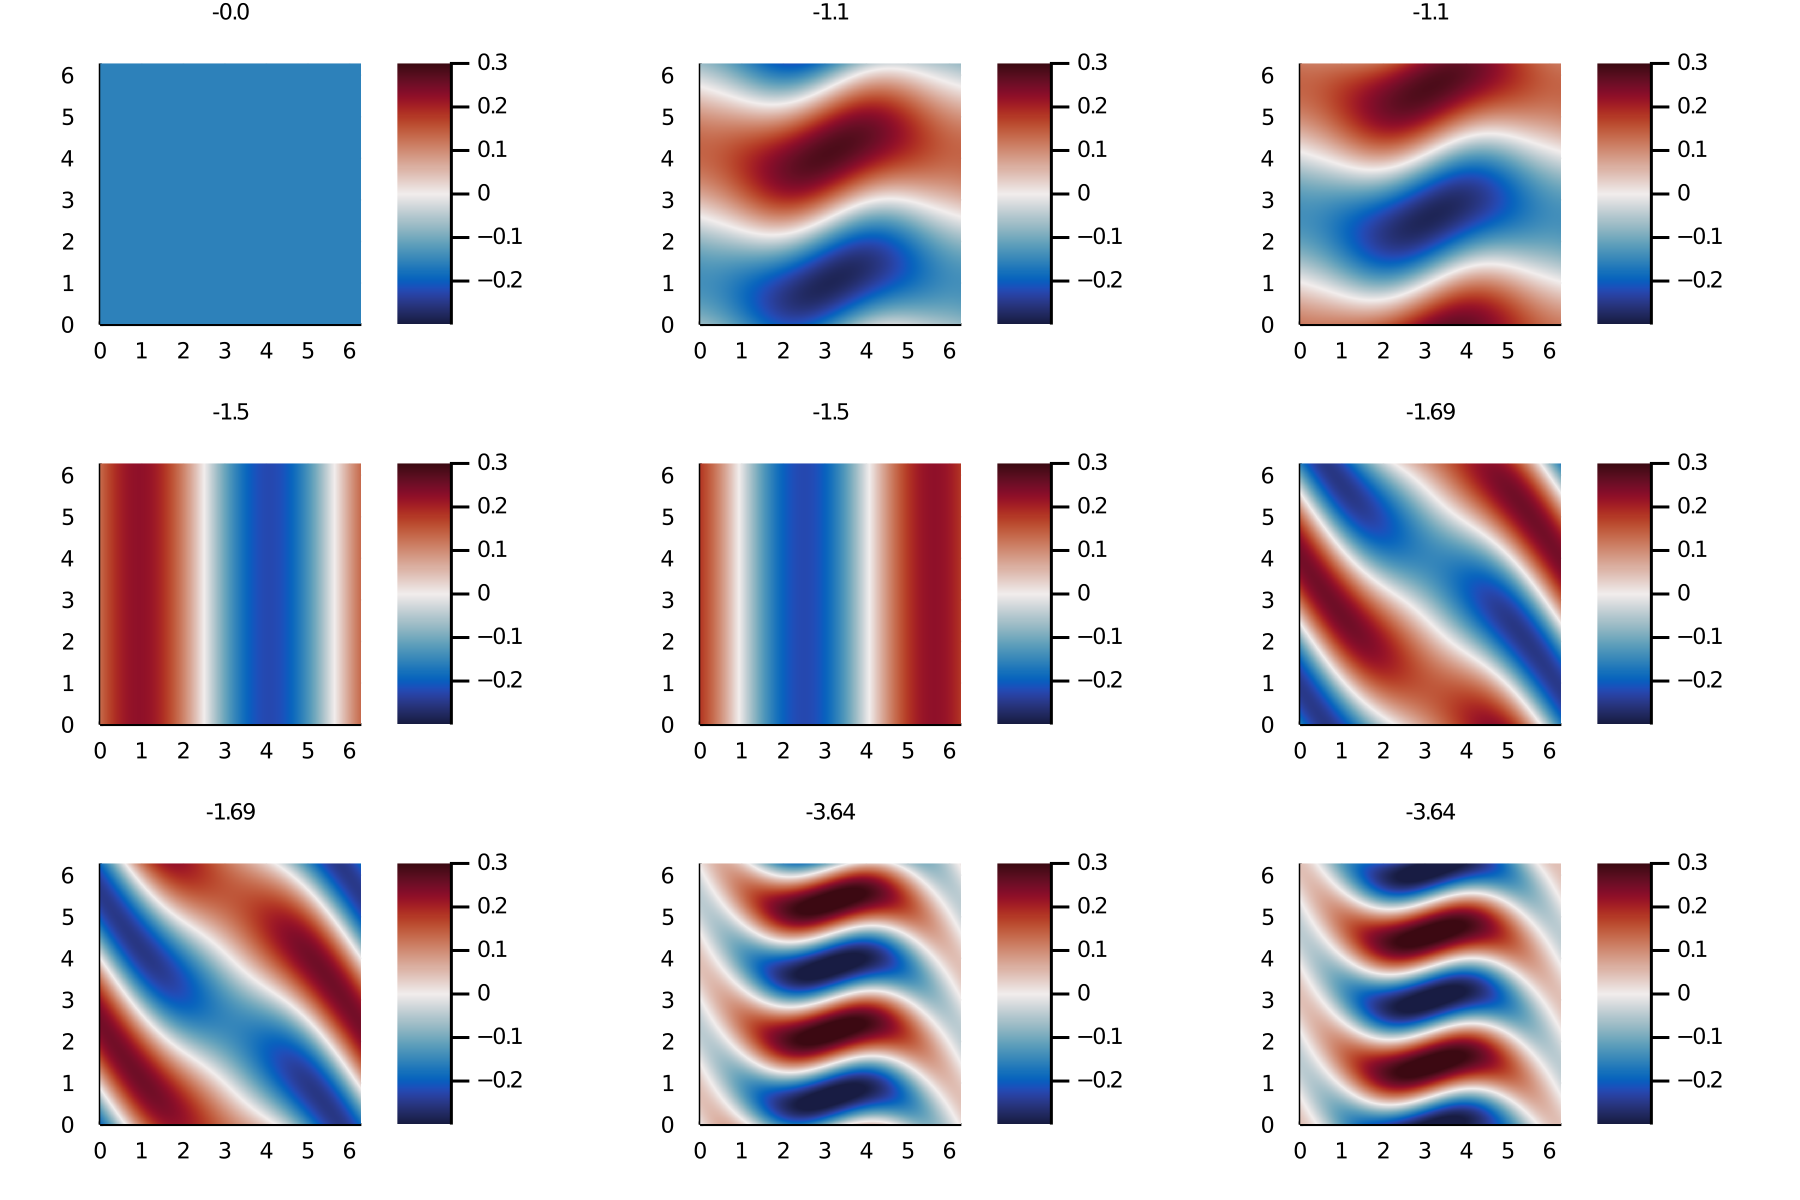

In [10]:
plot_color = :balance;
plots = []
for i in 1:topk
    push!(plots, plot_u(ctx, u[:,i], grid_resolution, grid_resolution,
         title=round(λ[i],digits=2), bdata=bdata, 
         color=plot_color, clims=(-0.3,0.3), titlefontsize=5, xtickfontsize=5,ytickfontsize=5))
    
end
Plots.plot(plots..., fmt = :png, dpi=300)